# DEAP:
DEAP (Distributed Evolutionary Algorithms in Python)

- **Flexibility**: Each component evolutionary algorithms is highly customizable
- **Ease of Use**: DEAP provides many built in tools, functions, and modules for creating and evaluating evolutionary algorithms.
- **Parallelization**: It integrates well with parallel computing frameworks, enabling faster execution for large, computationally expensive problems.
Evolutionary Algorithms Overview:

Why DEAP?
DEAP simplifies the above steps by providing the following:

- `base.Toolbox`: A container to register functions for generating individuals, performing genetic operations (crossover, mutation), and evaluating fitness.
- `Creator`: A module that allows you to define new types for individuals, including their fitness criteria (whether to maximize or minimize).
`logbook`: Tracks the performance of the algorithm across generations, including metrics like fitness and statistics.

In the example we use Deap to minimize Himmelblau's function. 

As you will see, very little code is needed to do so. 

![Deap Logo](./Deap%20Logo.png)



## Himmelblau's_function

### Multiple Minima
- Himmelblau' s function has four global minima, making it non-trivial for optimization algorithms.
- This property allows testing whether an algorithm can escape local minima and find the global one.
   
### Non-Convex Surface
- The surface of the function is non - convex, which means that there are regions where gradients can point in different directions, posing difficulties for optimization methods relying on gradient descent .
  
### Use in Benchmarking 
- Use in Himmelblau' s function is a classic benchmark for algorithms in optimization, machine learning, and evolutionary computation .

In [16]:
from IPython.display import IFrame
IFrame("https://en.wikipedia.org/wiki/Himmelblau%27s_function", width=1000, height=400)

#### Install dependencies:

### Structure of Deap algorithm:
#### Define **hyperparameters** 
The constants to be used by the program which typically require some tweaking to increase performance
#### Define **Fitness** and **Individual Classes**
To define the individual class and its associated fitness function, use Deap's `creator` module:
```
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
...
creator.create("Individual", list, fitness=creator.FitnessMin)
```
#### We then use the Toolbox to establish our program:
The toolbox is a container in DEAP that holds all the functions necessary for your algorithm. This includes functions for:
- Generating individuals
- Defining the evaluation function
- Registering genetic operators like selection, crossover, and mutation

#### Population and Individual Creation:
You need to define how individuals are generated and register it with the toolbox. This can be done using the tools.initRepeat function, which repeats the initialization of attributes.

#### Define Fitness 
Define fitness function and register it with the toolbox

#### Genetic Operators
Register genetic operators, which include:
- **Selection**
- **Crossover**
- **Mutation**

<hr />
<div style="text-align: center;">
    <img src="./Basic-structure-of-genetic-algorithm.png" alt="Basic structure of genetic algorithm" width="200"/>
</div>



In [ ]:
pip install plotly deap numpy matplotlib

# Configuration Setup
- Define some hyperparameters that will be used throughout the implementation.
- Additionally, we define the bounds for our variables and the tournament size for selection.

- **POPULATION_SIZE**: Number of individuals in each generation. 
- **GENOME_LENGTH**: Number of genes in each individual.
- **MUTATION_PROB**: The probability of mutation per gene.
- **CROSSOVER_PROB**: The probability of crossover between individuals.
- **BOUNDS**: The range for x and y in Himmelblau’s function.


In [26]:
# config.py
POPULATION_SIZE = 100
GENOME_LENGTH = 100
MUTATION_PROB = 0.05
CROSSOVER_PROB = 0.7
N_GENERATIONS = 1000
TOURNAMENT_SIZE = 3
BOUNDS = [-6, 6] 

# Defining the Objective Function
The problem we are solving is to minimize Himmelblau’s function, a standard optimization problem with multiple minima. We'll also add a constraint to ensure that the sum of x and y is less than 0. The penalty function is used to enforce this constraint.


In [28]:
def himmelblau(individual):
    x, y = individual
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2,

def penalty(individual):
    # Constraint: x + y < 0
    x, y = individual
    return max(0, x + y)

# Genetic Operators
The genetic algorithm relies on three key operations: crossover, mutation, and selection. These operations simulate reproduction, introduce variability, and ensure that the fittest individuals are selected for the next generation.

- **Crossover**: We use two-point crossover to combine two parents' genes to create offspring.
- **Mutation**: Mutates individual bits in the genome with a specified probability.
- **Selection**: We use tournament selection to choose the best individuals for reproduction.


In [30]:
from deap import tools

def crossover(ind1, ind2):
    return tools.cxTwoPoint(ind1, ind2)

def mutation(ind):
    return tools.mutFlipBit(ind, indpb=0.05)

def selection(population, k):
    # k is the number of individuals to select
    return tools.selTournament(population, k, tournsize=3)

# DEAP Initialization
We define how our individuals are created and their fitness is evaluated. In DEAP, we need to register individuals, population, and genetic operators using the toolbox. This provides an abstraction to work with individuals and operators in a modular way.

In [32]:
import random
from deap import base, creator, tools

# Define the individual and fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Register all the DEAP functions in the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, BOUNDS[0], BOUNDS[1])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registering Genetic Operators and Running the Algorithm
Now, we register the genetic operators (crossover, mutation, and selection) and set up the logging of statistics. Then, we run the evolutionary algorithm with DEAP’s `eaSimple` method.

In [42]:
from deap import algorithms
import numpy as np

toolbox.register("evaluate", himmelblau)
toolbox.register("mate", crossover)
toolbox.register("mutate", mutation)
toolbox.register("select", selection)

# Set up logging and statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
logbook.header = ["gen", "nevals"] + stats.fields

hall_of_fame = tools.HallOfFame(1)

# Run the algorithm and log statistics
population = toolbox.population(n=POPULATION_SIZE)
population, log = algorithms.eaSimple(population, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, 
                                      ngen=N_GENERATIONS, stats=stats, halloffame=hall_of_fame, verbose=True)

# Display the best solution
print("Best individual:", hall_of_fame[0])

gen	nevals	avg    	min     	max    
0  	100   	307.644	0.142412	1043.31
1  	73    	117.872	0.142412	526.759
2  	75    	60.0735	0.150205	223.99 
3  	72    	55.9881	0.150205	213.017
4  	76    	25.0965	0.150205	173.234
5  	75    	3.60307	0.150205	83.5145
6  	72    	2.21853	0.150205	170    
7  	79    	0.175187	0.150205	1.04411
8  	83    	1.4171  	0.150205	126.738
9  	64    	0.150205	0.150205	0.150205
10 	76    	0.150205	0.150205	0.150205
11 	71    	2.68197 	0.150205	126.738 
12 	69    	0.150205	0.150205	0.150205
13 	84    	2.28666 	0.150205	213.796 
14 	77    	2.28666 	0.150205	213.796 
15 	71    	1.41609 	0.150205	126.738 
16 	69    	1.41609 	0.150205	126.738 
17 	77    	0.150205	0.150205	0.150205
18 	71    	0.150205	0.150205	0.150205
19 	78    	1.41609 	0.150205	126.738 
20 	69    	0.150205	0.150205	0.150205
21 	79    	0.150205	0.150205	0.150205
22 	69    	0.150205	0.150205	0.150205
23 	60    	0.150205	0.150205	0.150205
24 	75    	0.150205	0.150205	0.150205
25 	69    	0.150205	0.150205	0

# Plotting Convergence
We visualize how the fitness of the population evolves over the generations by plotting the minimum, maximum, and average fitness values from the logbook.

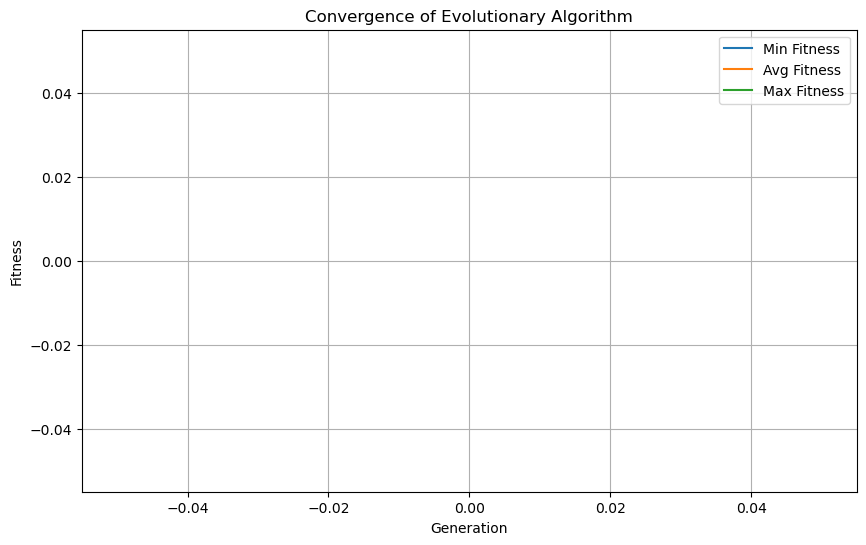

# Analysis


# Conclusion


Sources:
- https://aviral-agarwal.medium.com/implementation-of-genetic-algorithm-evolutionary-algorithm-in-python-using-deap-framework-c2d4bd247f70
- https://en.wikipedia.org/wiki/Himmelblau%27s_function
- https://deap.readthedocs.io/en/devel/examples/ga_onemax.html